In [1]:
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

# acquire and prepare 
import acquire as a
import prepare as p
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import json
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('NLP_df.csv', index_col=0)

In [3]:
df.head(10)

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
4,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
5,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
9,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
10,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...
12,donnemartin/system-design-primer,Python,*[English](README.md) ∙ [日本語](README-ja.md) ∙ ...
13,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://w..."
19,trekhleb/javascript-algorithms,JavaScript,# جافا سكريبت خوارزميات وهياكل البيانات\n\n[!...
20,TheAlgorithms/Python,Python,# The Algorithms - Python\n[![Gitpod Ready-to-...
22,airbnb/javascript,JavaScript,# Airbnb JavaScript Style Guide() {\n\n*A most...


In [4]:
# removes the first column which was not needed
# df = df[list(df.columns)[1:]]
df = df.reset_index(drop=True)

In [5]:
df.head(10)

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...
5,donnemartin/system-design-primer,Python,*[English](README.md) ∙ [日本語](README-ja.md) ∙ ...
6,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://w..."
7,trekhleb/javascript-algorithms,JavaScript,# جافا سكريبت خوارزميات وهياكل البيانات\n\n[!...
8,TheAlgorithms/Python,Python,# The Algorithms - Python\n[![Gitpod Ready-to-...
9,airbnb/javascript,JavaScript,# Airbnb JavaScript Style Guide() {\n\n*A most...


In [6]:
# PREP data

In [7]:
df = p.prep_github_data(df, 'readme_contents')
df.head(10)

/Users/guadalupeluna/Desktop/code-up-data-science/NLP_Project_Predicting_Readme_s/prepare.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean"]= df["clean"].str.replace("&#9;", "")


,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15354,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,15154,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9885,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,83002,8170
5,donnemartin/system-design-primer,Python,*[English](README.md) ∙ [日本語](README-ja.md) ∙ ...,*[English](README.md) ∙ [日本語](README-ja.md) ∙ ...,englishreadmemd readmejamd readmezhhansmd read...,englishreadmemd readmejamd readmezhhansmd read...,englishreadmemd readmejamd readmezhhansmd read...,33528,1845
6,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://w...","<div align=""center"">\r\n <a href=""https://w...",div aligncenter hrefhttpswwwcyc2018xyz img src...,div aligncent hrefhttpswwwcyc2018xyz img srcht...,div aligncenter hrefhttpswwwcyc2018xyz img src...,4222,167
7,trekhleb/javascript-algorithms,JavaScript,# جافا سكريبت خوارزميات وهياكل البيانات\n\n[!...,# جافا سكريبت خوارزميات وهياكل البيانات\n\n[!...,build statushttpstravisciorgtrekhlebjavascript...,build statushttpstravisciorgtrekhlebjavascript...,build statushttpstravisciorgtrekhlebjavascript...,8380,582
8,TheAlgorithms/Python,Python,# The Algorithms - Python\n[![Gitpod Ready-to-...,# The Algorithms - Python\n[![Gitpod Ready-to-...,algorithms python gitpod readytocodehttpsimgsh...,algorithm python gitpod readytocodehttpsimgshi...,algorithm python gitpod readytocodehttpsimgshi...,1770,55
9,airbnb/javascript,JavaScript,# Airbnb JavaScript Style Guide() {\n\n*A most...,# Airbnb JavaScript Style Guide() {\n\n*A most...,airbnb javascript style guide mostly reasonabl...,airbnb javascript style guid mostli reason app...,airbnb javascript style guide mostly reasonabl...,79559,7672


# remove arabic and japanese

### Explore

In [8]:
javascript_words = (' '.join(df[df.language == 'JavaScript'].lemmatized))
python_words = (' '.join(df[df.language == 'Python'].lemmatized))
go_words = (' '.join(df[df.language == 'Go'].lemmatized))
java_words = (' '.join(df[df.language == 'Java'].lemmatized))

In [9]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
#all_freq = pd.Series(all_words.split()).value_counts()

In [10]:
python_freq.head()

yes        1022
python      634
unknown     626
data        516
library     493
dtype: int64

In [11]:
word_counts = pd.concat([javascript_freq, python_freq, go_freq, java_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['javascript', 'python', 'go', 'java']
word_counts.head()

,javascript,python,go,java
source,953,86,65,46
javascript,827,43,5,2
&#9;,732,4,1282,23
function,484,42,56,5
icon,438,4,2,1


In [12]:
word_counts.sort_values('javascript', ascending=False).head()

,javascript,python,go,java
source,953,86,65,46
javascript,827,43,5,2
&#9;,732,4,1282,23
function,484,42,56,5
icon,438,4,2,1


In [13]:
word_counts.sort_values(['python', 'java'], ascending=[True, False]).head(10)

,javascript,python,go,java
td,258,0,0,182
aligncentera,153,0,0,172
altbr,151,0,0,172
width100px,151,0,0,172
titlecodeatd,0,0,0,127
flutter,0,0,0,45
guava,0,0,1,24
rxjava,0,0,0,24
okhttp,0,0,0,20
dubbo,0,0,1,18


#### Visualization

Text(0.5, 1.0, 'Python vs Java count for the top 20 most frequent words')

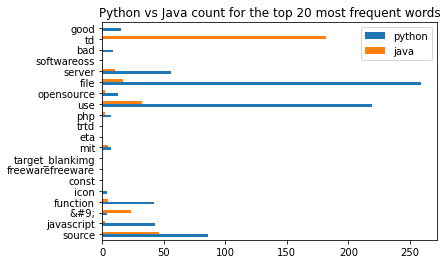

In [20]:
plt.rc('font', size=10)
word_counts.sort_values('javascript', ascending=False).head(20)[['python', 'java']].plot.barh()
plt.title('Python vs Java count for the top 20 most frequent words')

In [21]:
import matplotlib as mpl

/opt/homebrew/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/opt/homebrew/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:379: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 1152x648 with 0 Axes>

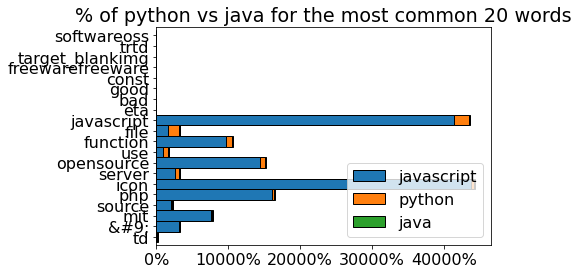

In [22]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='javascript', ascending=False)
 .head(20)
 .apply(lambda row: row / row['java'], axis=1)
 .drop(columns='go')
 .sort_values(by='python')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of python vs java for the most common 20 words')

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

### N-grams

Text(0.5, 1.0, 'Top 10 most common javascript bigrams')

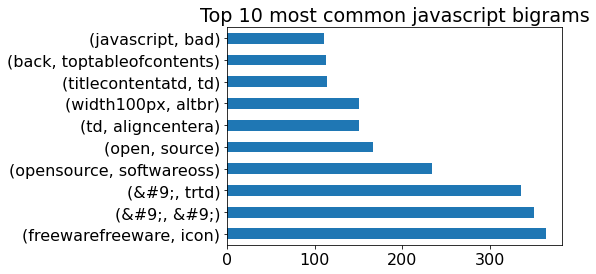

In [30]:
pd.Series(nltk.bigrams(javascript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common javascript bigrams')

### Word Cloud

(-0.5, 799.5, 599.5, -0.5)

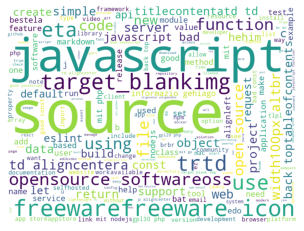

In [35]:
#Javascript word cloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(javascript_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

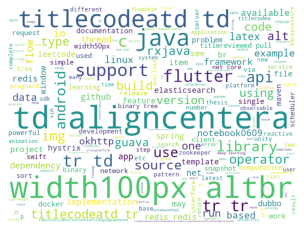

In [36]:
# Java word cloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(java_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

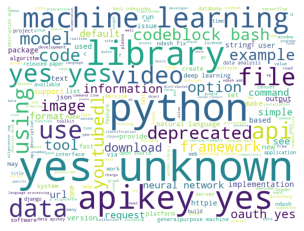

In [37]:
# Python word cloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(python_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

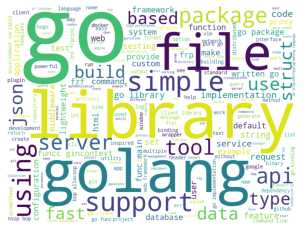

In [39]:
# go word cloud
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(go_words)
plt.imshow(img)
plt.axis('off')

### Modeling

#### Bag of words

In [46]:
df.columns

Index(['repo', 'language', 'readme_contents', 'original', 'clean', 'stemmed',
       'lemmatized', 'readme_length', 'word_count'],
      dtype='object')

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bag_of_words = cv.fit_transform(df.readme_contents)
bag_of_words

<110x44825 sparse matrix of type '<class 'numpy.int64'>'
	with 90812 stored elements in Compressed Sparse Row format>

In [49]:
pprint(df.readme_contents)
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names())

0      ![freeCodeCamp.org Social Banner](https://s3.a...
1      <p align="center"><a href="https://vuejs.org" ...
2      # [React](https://reactjs.org/) &middot; [![Gi...
3      <p align="center">\n  <a href="https://getboot...
4      # Public APIs [![Run tests](https://github.com...
                             ...                        
105    # <img src="https://github.com/gogs/gogs/raw/m...
106    <p align="center"><img align="center" style="w...
107    # IPTV\n\n![auto-update](https://github.com/ip...
108    # mermaid [![Build Status](https://travis-ci.o...
109    # 一个README容纳不下，第二个README接上\n\n<br/>\n\n## 目录\n...
Name: readme_contents, Length: 110, dtype: object


,00,000,0000,0001,0002,00020,00042,001,0010,002,...,한번에,합병,항목을,항목의,항목이,행렬,허용하는,효율을,효율적인,훨씬
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df.readme_contents)

pprint(df.readme_contents)
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

0      ![freeCodeCamp.org Social Banner](https://s3.a...
1      <p align="center"><a href="https://vuejs.org" ...
2      # [React](https://reactjs.org/) &middot; [![Gi...
3      <p align="center">\n  <a href="https://getboot...
4      # Public APIs [![Run tests](https://github.com...
                             ...                        
105    # <img src="https://github.com/gogs/gogs/raw/m...
106    <p align="center"><img align="center" style="w...
107    # IPTV\n\n![auto-update](https://github.com/ip...
108    # mermaid [![Build Status](https://travis-ci.o...
109    # 一个README容纳不下，第二个README接上\n\n<br/>\n\n## 目录\n...
Name: readme_contents, Length: 110, dtype: object


,00,000,0000,0001,0002,00020,00042,001,0010,002,...,한번에,합병,항목을,항목의,항목이,행렬,허용하는,효율을,효율적인,훨씬
0,0.0,0.004486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Bag of Ngrams

In [54]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_words = cv.fit_transform(df.readme_contents)

In [55]:
pprint(df.readme_contents)
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names())

0      ![freeCodeCamp.org Social Banner](https://s3.a...
1      <p align="center"><a href="https://vuejs.org" ...
2      # [React](https://reactjs.org/) &middot; [![Gi...
3      <p align="center">\n  <a href="https://getboot...
4      # Public APIs [![Run tests](https://github.com...
                             ...                        
105    # <img src="https://github.com/gogs/gogs/raw/m...
106    <p align="center"><img align="center" style="w...
107    # IPTV\n\n![auto-update](https://github.com/ip...
108    # mermaid [![Build Status](https://travis-ci.o...
109    # 一个README容纳不下，第二个README接上\n\n<br/>\n\n## 目录\n...
Name: readme_contents, Length: 110, dtype: object


,00 25,000 000,000 duh,000 erabiltzaile,000 izar,000 ns,000 people,000 pretrained,000 repositories,000 stars,...,합병 정렬은,항목을 차지하는,항목의 교환을,항목이 발견되거나,행렬 그래프,허용하는 삽입,효율을 가진다,효율적인 범용적인,효율적인 정렬,훨씬 안좋은
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modeling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df.readme_contents.apply(df.clean).apply(' '.join))
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

tree.score(X_train, y_train)